<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/TwitterAnalyzerDashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT WORK IN PROGRESS

In [ ]:
!pip install tweepy -qqq

In [ ]:
# # Python Script to Extract tweets of a
# # particular Hashtag using Tweepy and Pandas

# # import modules
# import pandas as pd
# import tweepy

# # function to display data of each tweet
# def printtweetdata(n, ith_tweet):
# 		print()
# 		print(f"Tweet {n}:")
# 		print(f"Username:{ith_tweet[0]}")
# 		print(f"Description:{ith_tweet[1]}")
# 		print(f"Location:{ith_tweet[2]}")
# 		print(f"Following Count:{ith_tweet[3]}")
# 		print(f"Follower Count:{ith_tweet[4]}")
# 		print(f"Total Tweets:{ith_tweet[5]}")
# 		print(f"Retweet Count:{ith_tweet[6]}")
# 		print(f"Tweet Text:{ith_tweet[7]}")
# 		print(f"Hashtags Used:{ith_tweet[8]}")


# # function to perform data extraction
# def scrape(words, date_since, numtweet):

# 		# Creating DataFrame using pandas
# 		db = pd.DataFrame(columns=['username',
# 								'description',
# 								'location',
# 								'following',
# 								'followers',
# 								'totaltweets',
# 								'retweetcount',
# 								'text',
# 								'hashtags'])

# 		# We are using .Cursor() to search
# 		# through twitter for the required tweets.
# 		# The number of tweets can be
# 		# restricted using .items(number of tweets)
# 		tweets = tweepy.Cursor(api.search_tweets,
# 							words, lang="en",
# 							since_id=date_since,
# 							tweet_mode='extended').items(numtweet)


# 		# .Cursor() returns an iterable object. Each item in
# 		# the iterator has various attributes
# 		# that you can access to
# 		# get information about each tweet
# 		list_tweets = [tweet for tweet in tweets]

# 		# Counter to maintain Tweet Count
# 		i = 1

# 		# we will iterate over each tweet in the
# 		# list for extracting information about each tweet
# 		for tweet in list_tweets:
# 				username = tweet.user.screen_name
# 				description = tweet.user.description
# 				location = tweet.user.location
# 				following = tweet.user.friends_count
# 				followers = tweet.user.followers_count
# 				totaltweets = tweet.user.statuses_count
# 				retweetcount = tweet.retweet_count
# 				hashtags = tweet.entities['hashtags']

# 				# Retweets can be distinguished by
# 				# a retweeted_status attribute,
# 				# in case it is an invalid reference,
# 				# except block will be executed
# 				try:
# 						text = tweet.retweeted_status.full_text
# 				except AttributeError:
# 						text = tweet.full_text
# 				hashtext = list()
# 				for j in range(0, len(hashtags)):
# 						hashtext.append(hashtags[j]['text'])

# 				# Here we are appending all the
# 				# extracted information in the DataFrame
# 				ith_tweet = [username, description,
# 							location, following,
# 							followers, totaltweets,
# 							retweetcount, text, hashtext]
# 				db.loc[len(db)] = ith_tweet

# 				# Function call to print tweet data on screen
# 				printtweetdata(i, ith_tweet)
# 				i = i+1
# 		filename = 'scraped_tweets.csv'

# 		# we will save our database as a CSV file.
# 		db.to_csv(filename)

# if __name__ == '__main__':

# 		# Enter your own credentials obtained
# 		# from your developer account
# 		consumer_key = "XEbKWYnZA41D2kL8NwcX9VsOq"
# 		consumer_secret = "zC1Q5k7kcRJDolB1WpMOQhM19fc83rTHLOVulQyAb7hClPDRhG"
# 		access_key = "1001089834054705152-s9sIcfTiQDHuWIeSSH7ZA6ctl07L0e"
# 		access_secret = "ImsZuxof8ChbYQH14aQZYHQWJD0p3ODQkWQ5Y9iSDuV1W"


# 		auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# 		auth.set_access_token(access_key, access_secret)
# 		api = tweepy.API(auth)

# 		# Enter Hashtag and initial date
# 		print("Enter Twitter HashTag to search for")
# 		words = input()
# 		print("Enter Date since The Tweets are required in yyyy-mm--dd")
# 		date_since = input()

# 		# number of tweets you want to extract in one run
# 		numtweet = 100
# 		scrape(words, date_since, numtweet)
# 		print('Scraping has completed!')


In [ ]:
from google.colab import drive

drive.mount('/drive')


Mounted at /drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/drive/My Drive/DataSet/Sentiment.csv', encoding='ISO-8859-1')

In [ ]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [ ]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df.drop(columns = ['1467810369','NO_QUERY', 'Mon Apr 06 22:19:45 PDT 2009', '_TheSpecialOne_'], inplace = True)

In [ ]:
df.head()

,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
df.columns  = ['target', 'tweet']

In [ ]:
df.head()

,target,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
df['target'].nunique()

2

[]

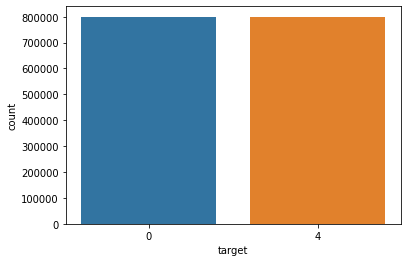

In [ ]:
sns.countplot(x = 'target', data = df)
plt.plot()

In [ ]:
df = pd.read_csv('/drive/My Drive/DataSet/Twitter_Data.csv')

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df['category'].nunique()

3

In [ ]:
df['category'].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

[]

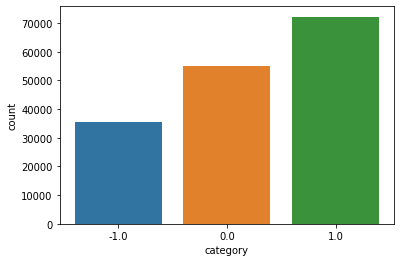

In [ ]:
sns.countplot(x = 'category', data = df)
plt.plot(      )